# Importación de librerías y lectura del data frame

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as math

In [ ]:
df_secundario = pd.read_csv("/content/drive/MyDrive/secondary_data.csv", delimiter=';')

# Boxplot

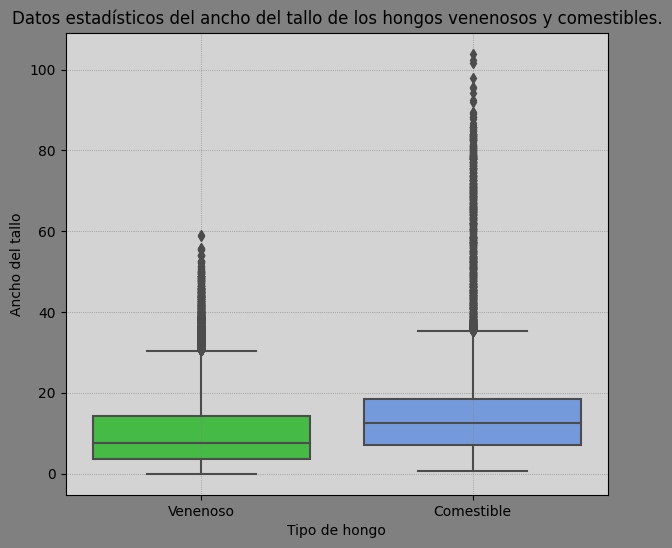

In [ ]:
fig = plt.figure(dpi=100, figsize=(7, 6))
fig.patch.set_facecolor('grey')
sns.boxplot(df_secundario, x = "class", y = "stem-width", palette = ['limegreen', 'cornflowerblue']).set_facecolor("lightgray")
labels = ["Venenoso","Comestible"]
rango = (0, 1)
plt.title("Datos estadísticos del ancho del tallo de los hongos venenosos y comestibles.")
plt.xticks(rango, labels)
plt.xlabel("Tipo de hongo")
plt.ylabel("Ancho del tallo")
plt.gcf().set_facecolor("gray")
plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

# Barplot

In [ ]:
argupados_venenosos_color_gorra = df_secundario[df_secundario["class"] == 'p'].groupby(df_secundario['cap-color'])
cantidades_color_gorra_venenosos = argupados_venenosos_color_gorra.agg({"cap-color":"count"})
argupados_comestibles_color_gorra = df_secundario[df_secundario["class"] == 'e'].groupby(df_secundario['cap-color'])
cantidades_color_gorra_comestibles = argupados_comestibles_color_gorra.agg({"cap-color":"count"})

In [ ]:
cantidades_color_gorra_venenosos = cantidades_color_gorra_venenosos.rename(columns={"cap-color": "Venenoso"})
cantidades_color_gorra_comestibles = cantidades_color_gorra_comestibles.rename(columns={"cap-color": "Comestible"})
cantidades_color_gorra_venenosos["Comestible"] = cantidades_color_gorra_comestibles["Comestible"]

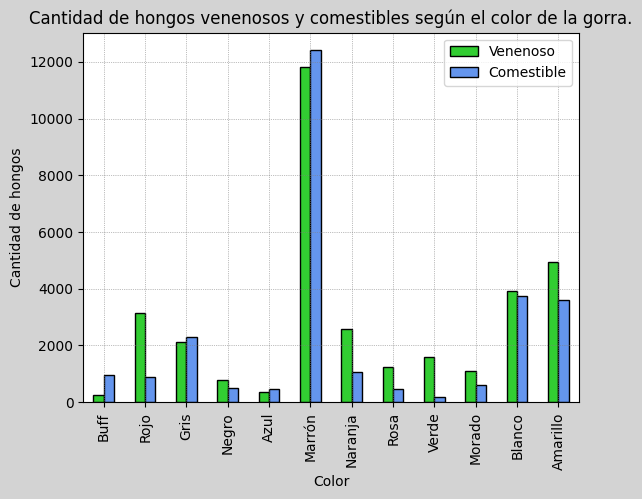

In [ ]:
labels = ["Buff","Rojo", "Gris","Negro","Azul","Marrón","Naranja","Rosa", "Verde", "Morado", "Blanco", "Amarillo"]
rango = (0, 1, 2, 3, 4, 5, 6, 7, 8,9 ,10, 11)
cantidades_color_gorra_venenosos.plot(kind='bar', color = ['limegreen', 'cornflowerblue'], edgecolor = 'black')
plt.title("Cantidad de hongos venenosos y comestibles según el color de la gorra.")
plt.xticks(rango, labels)
plt.xlabel("Color")
plt.ylabel("Cantidad de hongos")
plt.gcf().set_facecolor("lightgray")
plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

# Violinsplot

In [ ]:
comestibles = df_secundario[df_secundario["class"] == 'e']
venenosos = df_secundario[df_secundario["class"] == 'p']

Para los hongos venenosos

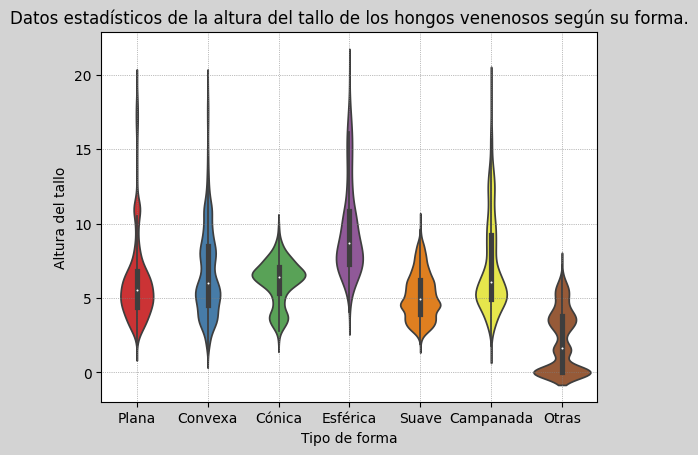

In [ ]:
labels = ["Plana","Convexa", "Cónica","Esférica","Suave","Campanada","Otras"]
rango = (0, 1, 2, 3, 4, 5, 6)
sns.violinplot(venenosos, x = "cap-shape", y = "stem-height", order=["f", "x", "c", "p", "s", "b", "o"], linewidth=1.25, palette="Set1")
plt.title("Datos estadísticos de la altura del tallo de los hongos venenosos según su forma.")
plt.xticks(rango, labels)
plt.xlabel("Tipo de forma")
plt.ylabel("Altura del tallo")
plt.gcf().set_facecolor("lightgray")
plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

Para los hongos comestibles.

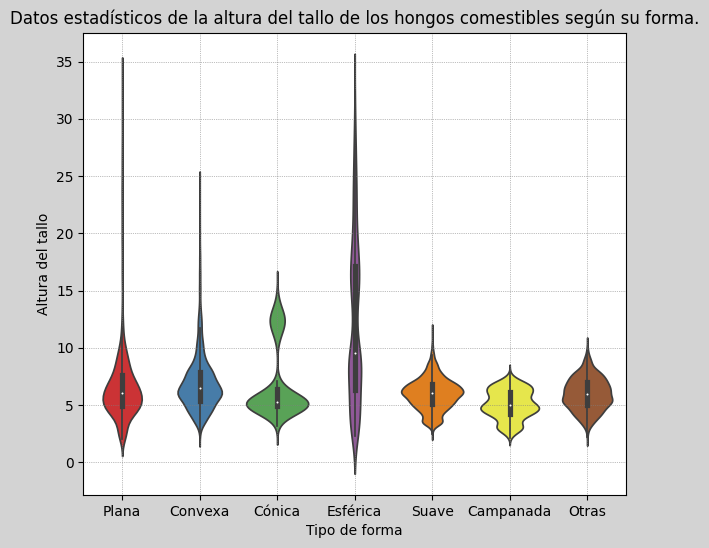

In [ ]:
fig = plt.figure(dpi=100, figsize=(7, 6))
fig.patch.set_facecolor('grey')
labels = ["Plana","Convexa", "Cónica","Esférica","Suave","Campanada","Otras"]
rango = (0, 1, 2, 3, 4, 5, 6)
sns.violinplot(comestibles, x = "cap-shape", y = "stem-height", order=["f", "x", "c", "p", "s", "b", "o"], linewidth=1.25, palette="Set1")
plt.title("Datos estadísticos de la altura del tallo de los hongos comestibles según su forma.")
plt.xticks(rango, labels)
plt.xlabel("Tipo de forma")
plt.ylabel("Altura del tallo")
plt.gcf().set_facecolor("lightgray")
plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

# Heatmap

In [ ]:
def definir_rangos(x):

  devolver = 0
  if math.trunc(x) in range(0, 1):
    devolver = (0, 1)
  elif math.trunc(x) in range(1, 4):
    devolver = (1, 4)
  elif math.trunc(x) in range(4, 8):
    devolver = (4, 8)
  elif math.trunc(x) in range(8, 12):
    devolver = (8, 12)
  elif math.trunc(x) in range(12, 20):
    devolver = (12, 20)
  elif math.trunc(x) in range(20, 30):
    devolver = (20, 30)
  elif math.trunc(x) in range(30, 70):
    devolver = (30, 70)

  return devolver

In [ ]:
df_secundario["rango-diametro"] = df_secundario["cap-diameter"].map(lambda x: definir_rangos(x))

In [ ]:
matriz_venenosos = df_secundario[df_secundario["class"] == 'p'].pivot_table(index= "rango-diametro", columns = "habitat", values="class", aggfunc="count")
matriz_venenosos['u'] = np.nan
matriz_venenosos['w'] = np.nan
matriz_venenosos = matriz_venenosos.T.rename({(0, 1):"(0, 1)",(1, 4):"(1, 4)",(4, 8):"(4, 8)",(8, 12):"(8, 12)",(12, 20):"(12, 20)",(20, 30):"(20, 30)",(30, 70):"(30, 70)"}, axis=1).T

In [ ]:
matriz_comestibles= df_secundario[df_secundario["class"] == 'e'].pivot_table(index= "rango-diametro", columns = "habitat", values="class", aggfunc="count")
matriz_comestibles = matriz_comestibles.T.rename({(0, 1):"(0, 1)",(1, 4):"(1, 4)",(4, 8):"(4, 8)",(8, 12):"(8, 12)",(12, 20):"(12, 20)",(20, 30):"(20, 30)",(30, 70):"(30, 70)"}, axis=1).T
matriz_comestibles['p'] = np.nan

In [ ]:
def establecer_ceros(matriz, matriz_2):
  for i in matriz.columns:
    for j in matriz.index:
        if (math.isnan(matriz[i].loc[j]) == False and math.isnan(matriz_2[i].loc[j]) == True):
          matriz_2[i].loc[j] = 0
        elif (math.isnan(matriz[i].loc[j]) == True and math.isnan(matriz_2[i].loc[j]) == False):
          matriz[i].loc[j] = 0

In [ ]:
establecer_ceros(matriz_venenosos, matriz_comestibles)

In [ ]:
def calcular_porcentajes(matriz, matriz_2):
  for i in matriz.columns:
    for j in matriz.index:
      if((matriz[i].loc[j] != np.NaN) and (matriz_2[i].loc[j] != np.NaN)):
          matriz[i].loc[j] = (matriz[i].loc[j]/(matriz[i].loc[j]+ matriz_2[i].loc[j]))*100


In [ ]:
calcular_porcentajes(matriz_venenosos, matriz_comestibles)

In [ ]:
matriz_venenosos = matriz_venenosos.fillna(-40)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Bosque'),
  Text(1.5, 0, 'Césped'),
  Text(2.5, 0, 'Brézal'),
  Text(3.5, 0, 'Hoja'),
  Text(4.5, 0, 'Prado'),
  Text(5.5, 0, 'Urbano'),
  Text(6.5, 0, 'Residuo'),
  Text(7.5, 0, 'Camino')])

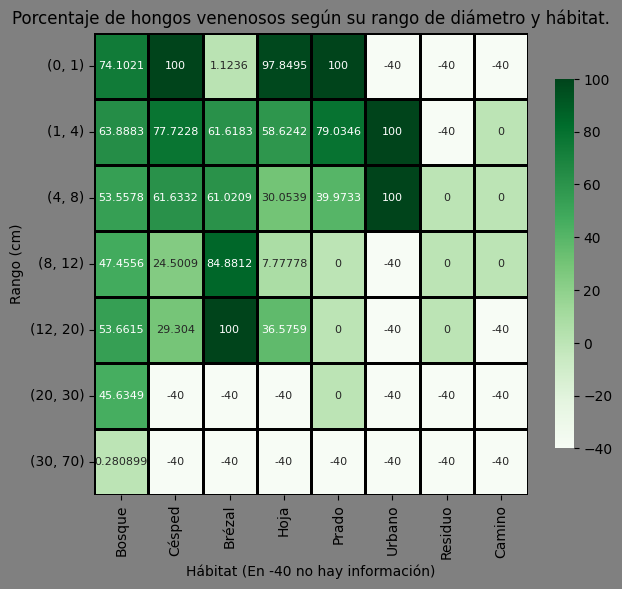

In [ ]:
fig = plt.figure(figsize=(7, 6))
fig.patch.set_facecolor('grey')
labels = ["Bosque","Césped", "Brézal","Hoja","Prado","Urbano","Residuo", "Camino"]
rango = (0, 1, 2, 3, 4, 5, 6, 7)
sns.heatmap(matriz_venenosos, annot = True, fmt='g', annot_kws= {'size': 8}, xticklabels = labels, cmap = "Greens",linewidth=1, linecolor='black', cbar_kws={"shrink": 0.8})
plt.title("Porcentaje de hongos venenosos según su rango de diámetro y hábitat.")
plt.xlabel("Hábitat (En -40 no hay información)")
plt.ylabel("Rango (cm)")
plt.yticks(rotation = 360)
plt.xticks(rotation = 90)


Aclaraciones:
La diferencia entre 0 y -40 es que con -40 no hay hongos con esa caracterisitca sea venenoso o comestible. A lo que voy con esto, es que si hicera un heatmap con los comestibles, en donde hay un -40 en venenoso tambien habra uno en el de comestibles, mientras que si hay un 0 en uno habra un 100 en otro. Esto lo decidí hacer de esta manera ya que considero importante que se pueda diferenciar de lo que no hay información con que no hay un hongo venenoso en ese rango pero si comestible.